In [2]:
# AQI Mapping of Indian Cities – Real-Time Dataset (2023–2025) using PM10

import pandas as pd

# ========== 1. Loading & previewing Dataset ==========
df = pd.read_csv("C://Users//Saayan Chowdhury//Documents//COMPUTER//GUVI//AQI.csv")
print(df.head(3))

# ========== 2. Dropping & filtering incomplete entries ==========
df = df.dropna(subset=["latitude", "longitude", "city", "station", "pollutant_id", "pollutant_avg"])
df = df[df["pollutant_id"].str.upper() == "PM10"]
df["pollutant_avg"] = df["pollutant_avg"].astype(float)
df = df.rename(columns={"pollutant_avg": "PM10"})

# ========== 3. Converting PM10 to AQI & Categorizing it ==========
def pm10_to_aqi(pm10):
    if pm10 <= 50: return round((50 / 50) * pm10)
    elif pm10 <= 100: return round(((100 - 51) / (100 - 51)) * (pm10 - 51) + 51)
    elif pm10 <= 250: return round(((200 - 101) / (250 - 101)) * (pm10 - 101) + 101)
    elif pm10 <= 350: return round(((300 - 201) / (350 - 251)) * (pm10 - 251) + 201)
    elif pm10 <= 430: return round(((400 - 301) / (430 - 351)) * (pm10 - 351) + 301)
    else: return 500

df["AQI"] = df["PM10"].apply(pm10_to_aqi)

def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df["AQI_Category"] = df["AQI"].apply(categorize_aqi)

df_map = df[["city", "state", "station", "latitude", "longitude", "PM10", "AQI", "AQI_Category"]].drop_duplicates()

# ========== 4. Save Clean File ==========
df_map.to_csv("realtime_india_aqi.csv", index=False)
print("\n File saved as 'realtime_india_aqi.csv'")
print(df_map.head(5))


  country           state           city  \
0   India  Andhra_Pradesh     Vijayawada   
1   India  Andhra_Pradesh     Vijayawada   
2   India  Andhra_Pradesh  Visakhapatnam   

                                  station          last_update   latitude  \
0         Rajiv Nagar, Vijayawada - APPCB  19-05-2025 10:00:00  16.554731   
1         Rajiv Nagar, Vijayawada - APPCB  19-05-2025 10:00:00  16.554731   
2  GVM Corporation, Visakhapatnam - APPCB  19-05-2025 10:00:00  17.720000   

   longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
0   80.64911          SO2           20.0           23.0           21.0  
1   80.64911        OZONE           17.0           35.0           22.0  
2   83.30000         PM10           23.0           66.0           36.0  

 File saved as 'realtime_india_aqi.csv'
                 city           state  \
2       Visakhapatnam  Andhra_Pradesh   
6            Byrnihat           Assam   
23  Rajamahendravaram  Andhra_Pradesh   
33         Vijaya

C:\Users\Saayan Chowdhury\AppData\Local\Temp\ipykernel_27552\418357431.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x600 with 0 Axes>

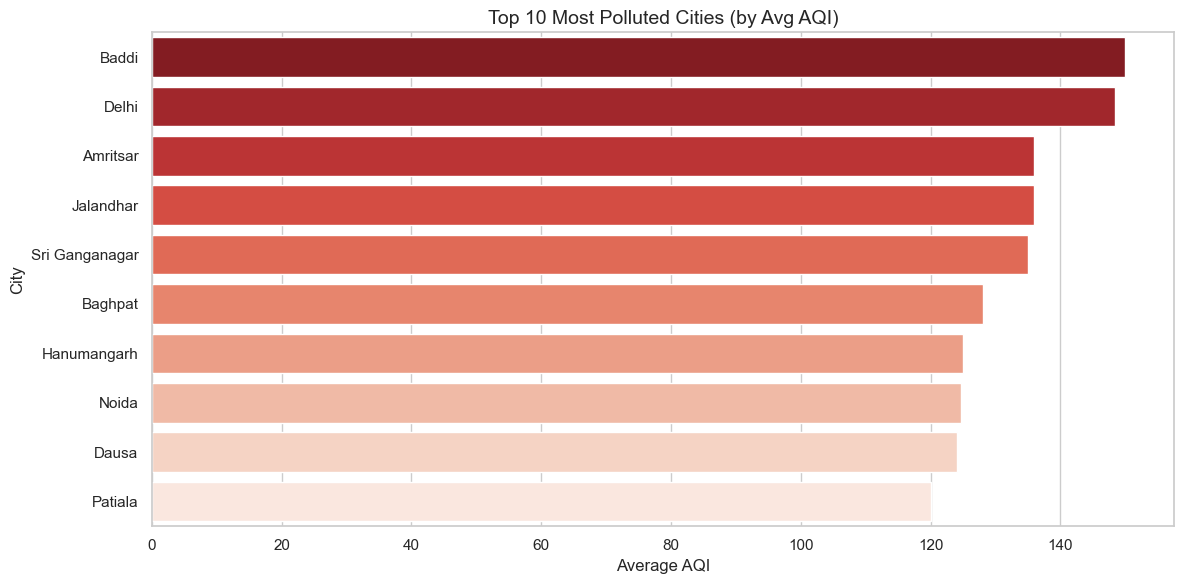

C:\Users\Saayan Chowdhury\AppData\Local\Temp\ipykernel_27552\418357431.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




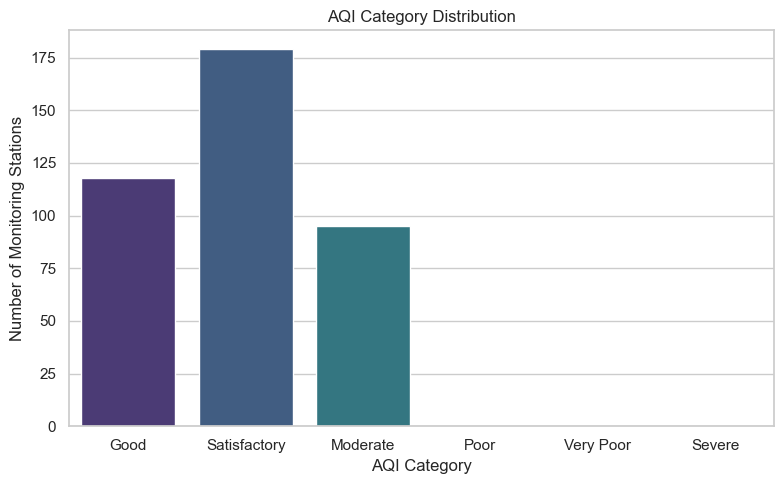

C:\Users\Saayan Chowdhury\AppData\Local\Temp\ipykernel_27552\418357431.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




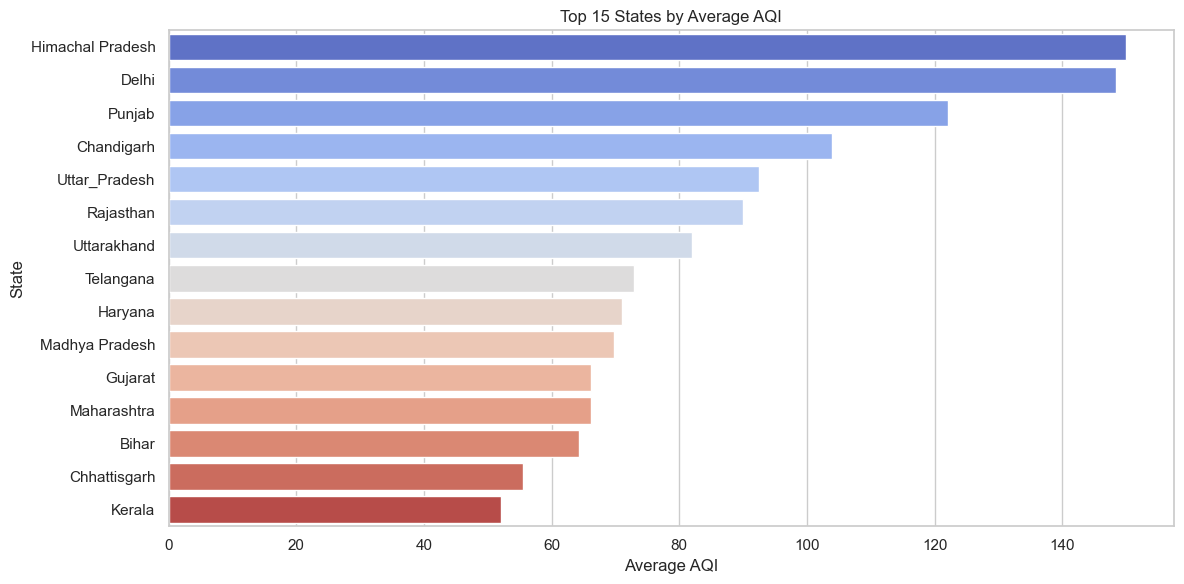

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Loading Dataset ==========
df = pd.read_csv("C://Users//Saayan Chowdhury//Documents//COMPUTER//GUVI//realtime_india_aqi.csv")
df = df.dropna(subset=["AQI", "city", "state", "AQI_Category"])
df = df[df["AQI"] > 0]

# Setup
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# ========== 2. Top 10 Most Polluted Cities ==========
top10 = df.groupby("city")["AQI"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 Most Polluted Cities (by Avg AQI)", fontsize=14)
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("top10_polluted_cities.png")
plt.show()

# ========== 3. AQI Category Distribution ==========
plt.figure(figsize=(8, 5))
category_counts = df["AQI_Category"].value_counts().reindex(["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"])
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Number of Monitoring Stations")
plt.tight_layout()
plt.savefig("aqi_category_distribution.png")
plt.show()

# ========== 4. State-wise Avg AQI ==========
state_avg = df.groupby("state")["AQI"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title("Top 15 States by Average AQI")
plt.xlabel("Average AQI")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("statewise_aqi.png")
plt.show()


In [5]:
import pandas as pd
import plotly.express as px

# ========== 1. Loading Dataset ==========
df = pd.read_csv("C://Users//Saayan Chowdhury//Documents//COMPUTER//GUVI//realtime_india_aqi.csv")
df = df.dropna(subset=["latitude", "longitude", "AQI", "AQI_Category"])
df = df[df["AQI"] > 0]

# ========== 2. Colouring Map ==========
aqi_color_map = {
    'Good': '#00e400',
    'Satisfactory': '#a3c853',
    'Moderate': '#ffff00',
    'Poor': '#ff7e00',
    'Very Poor': '#ff0000',
    'Severe': '#7e0023'
}

# ========== 3. Plotting ==========
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="AQI_Category",
    size="AQI",
    hover_name="city",
    hover_data={"AQI": True, "PM10": True, "station": True, "state": True},
    size_max=22,
    zoom=4.5,
    center={"lat": 22.9734, "lon": 78.6569},
    title="AQI Map of Indian Cities (2023–2025 PM10-Based)",
    mapbox_style="carto-positron",
    color_discrete_map=aqi_color_map,
    template="plotly_white"
)

# ========== 4. Responsive Layout ==========
fig.update_layout(
    legend_title="AQI Category",
    title_x=0.5,
    autosize=True,
    margin=dict(l=0, r=0, t=50, b=0)
)

# ========== 5. Saving Responsive Map ==========
fig.write_html(
    "aqi_map.html",
    full_html=True,
    include_plotlyjs="cdn"
)

print("Map saved as 'aqi_map.html'")


Map saved as 'aqi_map.html'


C:\Users\Saayan Chowdhury\AppData\Local\Temp\ipykernel_27552\214518972.py:20: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

